
Options: [1] Ask Query  [2] Rate Satisfaction  [3] Show Dashboard  [4] Exit
Choose an option: 1
Enter your query: Weather today
Query logged!

Options: [1] Ask Query  [2] Rate Satisfaction  [3] Show Dashboard  [4] Exit
Choose an option: 3

----- Dashboard -----
Total Queries: 1
Most Common Topics:
weather: 1
No satisfaction ratings yet.


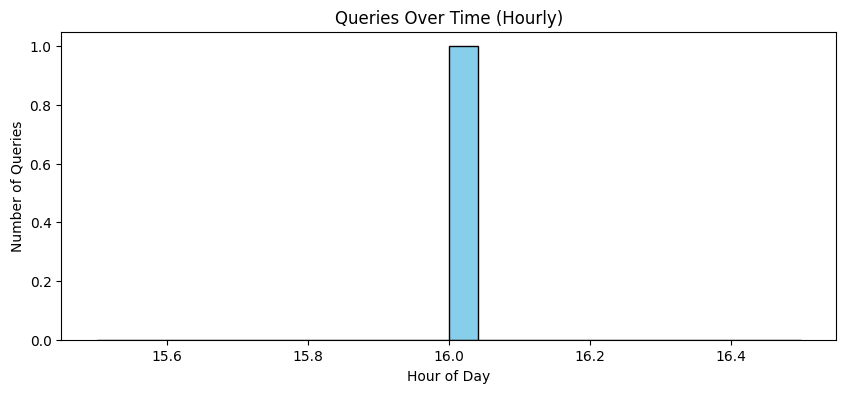

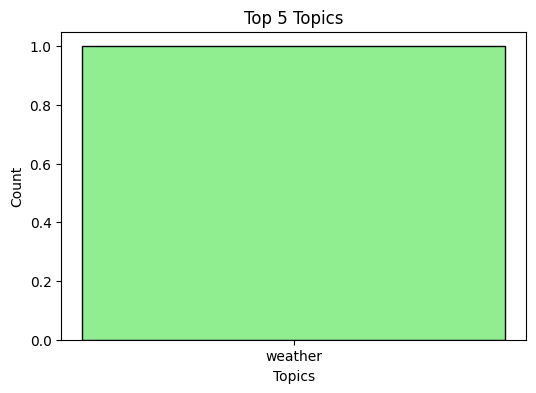


Options: [1] Ask Query  [2] Rate Satisfaction  [3] Show Dashboard  [4] Exit


In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import datetime

# ----- Data Storage -----
user_queries = []      # stores all queries
topics_counter = Counter()  # counts topics
satisfaction_ratings = []   # stores ratings (1-5)

# ----- Functions -----
def log_query(query):
    user_queries.append({"query": query, "time": datetime.datetime.now()})
    # Simple keyword extraction for topics (take first word as topic)
    topic = query.split()[0].lower() if query else "unknown"
    topics_counter[topic] += 1

def log_satisfaction(rating):
    try:
        rating = int(rating)
        if 1 <= rating <= 5:
            satisfaction_ratings.append(rating)
        else:
            print("Rating must be between 1-5.")
    except ValueError:
        print("Invalid rating input.")

def show_dashboard():
    print("\n----- Dashboard -----")
    print(f"Total Queries: {len(user_queries)}")
    print("Most Common Topics:")
    for topic, count in topics_counter.most_common(5):
        print(f"{topic}: {count}")

    if satisfaction_ratings:
        avg_rating = sum(satisfaction_ratings)/len(satisfaction_ratings)
        print(f"Average Satisfaction Rating: {avg_rating:.2f}")
    else:
        print("No satisfaction ratings yet.")

    # Plot queries over time
    times = [q['time'] for q in user_queries]
    if times:
        plt.figure(figsize=(10,4))
        plt.hist([t.hour for t in times], bins=24, color='skyblue', edgecolor='black')
        plt.xlabel("Hour of Day")
        plt.ylabel("Number of Queries")
        plt.title("Queries Over Time (Hourly)")
        plt.show()

    # Plot top topics
    if topics_counter:
        plt.figure(figsize=(6,4))
        topics, counts = zip(*topics_counter.most_common(5))
        plt.bar(topics, counts, color='lightgreen', edgecolor='black')
        plt.xlabel("Topics")
        plt.ylabel("Count")
        plt.title("Top 5 Topics")
        plt.show()

    # Plot satisfaction ratings
    if satisfaction_ratings:
        plt.figure(figsize=(6,4))
        plt.hist(satisfaction_ratings, bins=5, color='salmon', edgecolor='black', rwidth=0.8)
        plt.xlabel("Rating")
        plt.ylabel("Count")
        plt.title("User Satisfaction Ratings")
        plt.show()

# ----- Main Loop -----
while True:
    print("\nOptions: [1] Ask Query  [2] Rate Satisfaction  [3] Show Dashboard  [4] Exit")
    choice = input("Choose an option: ")

    if choice == "1":
        query = input("Enter your query: ")
        log_query(query)
        print("Query logged!")

    elif choice == "2":
        rating = input("Enter rating (1-5): ")
        log_satisfaction(rating)

    elif choice == "3":
        show_dashboard()

    elif choice == "4":
        print("Exiting...")
        break
    else:
        print("Invalid choice.")
